In [ ]:
import sys
sys.path.append('/home/elena/astrocosmolib/')

import numpy as np 
import matplotlib.pyplot as plt

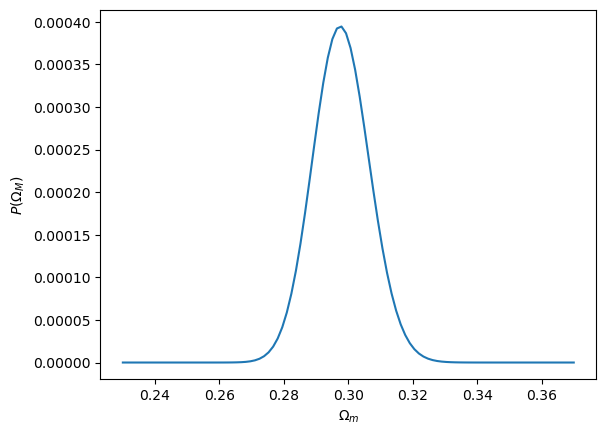

In [2]:
#Nota: la prior è uniforme: una funzione a gradino 

omegam, chi2 = np.load("chi2_values.npy")

posterior = np.exp(-0.5 * chi2)

plt.plot(omegam, posterior)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")
plt.show()

In [3]:
#Voglio campionare quella distribuzione 

from scipy.interpolate import interp1d

interp_posterior = interp1d(omegam, posterior, kind='cubic')

#dovrei trovare il picco della posterior (minimo del chi2)

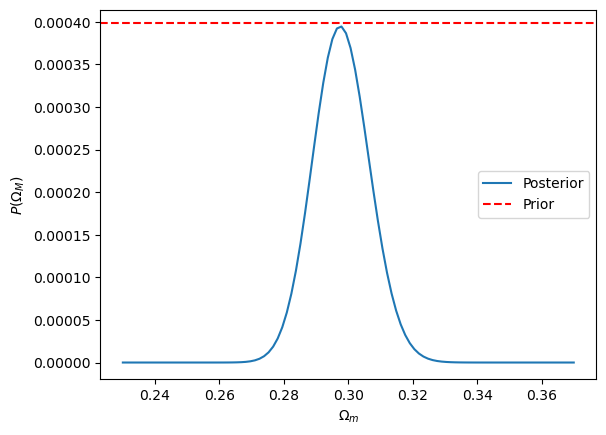

In [4]:
#Assumo q(x)=cost=1.01*max(f(x))

k = 1.01 * np.max(posterior)

plt.plot(omegam, posterior)
plt.axhline(k, color='r', linestyle='--')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")
plt.legend(["Posterior", "Prior"])
plt.show()

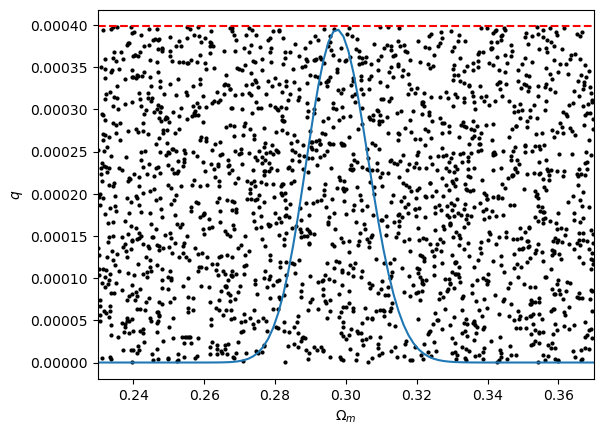

In [5]:
#posso generaare un numero grande a piacere di omegam, oppure decidere quanti numeri avere alla fine e riempire finchè non arrivo a quel numero.

#genero set di numeri random

n_attemps = 2000

omega_m_try = np.random.uniform(0.23, 0.37, n_attemps)
u = np.random.uniform(0, 1, n_attemps)

#plot dei punti generati
plt.plot(omega_m_try, u*k, 'o', color = 'black', markersize=2)
plt.plot(omegam, posterior)
plt.axhline(k, color='r', linestyle='--')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$q$")
plt.xlim(0.23, 0.37)
plt.show()

In [6]:
ff = interp_posterior(omega_m_try)

#condizione di accettazione
acc = ff > k*u

#acc è un array in cui ci sono le info se il punto è accettao o meno
acc

#percentuale di putni accetati
acc_rate = np.sum(acc) / n_attemps
print(f"Acceptance rate: {acc_rate:.2f}")

Acceptance rate: 0.14


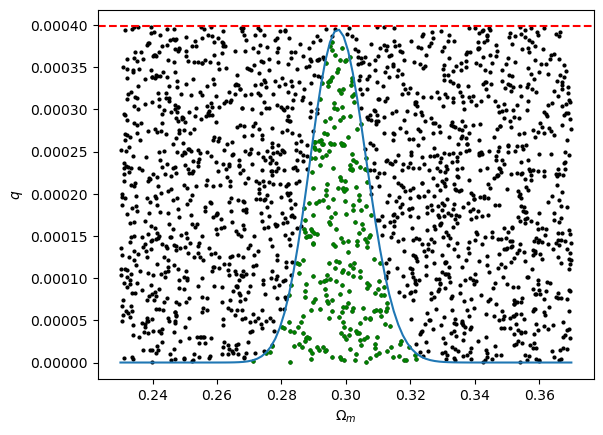

In [7]:
#plot dei punti accettati
plt.plot(omega_m_try, u*k, 'o', color = 'black', markersize=2)
plt.plot(omega_m_try[acc], u[acc]*k, 'o', color = 'green', markersize=2)
plt.plot(omegam, posterior)
plt.axhline(k, color='r', linestyle='--')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$q$")
plt.show()

In [8]:
#stima omega_m

omega_m = np.mean(omega_m_try[acc])
omega_m_err = np.std(omega_m_try[acc])
print("Omega_m = ", omega_m, "+/-", omega_m_err)

Omega_m =  0.2981323236050433 +/- 0.008539140616602268
